# To predict diabetes using PIMA diabetes data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
data = pd.read_csv("/content/pima-indians-diabetes.csv")

In [12]:
data.shape

(767, 9)

In [13]:
data.head(5)

6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

In [14]:
# check if any null value is present
data.isnull().values.any()

False

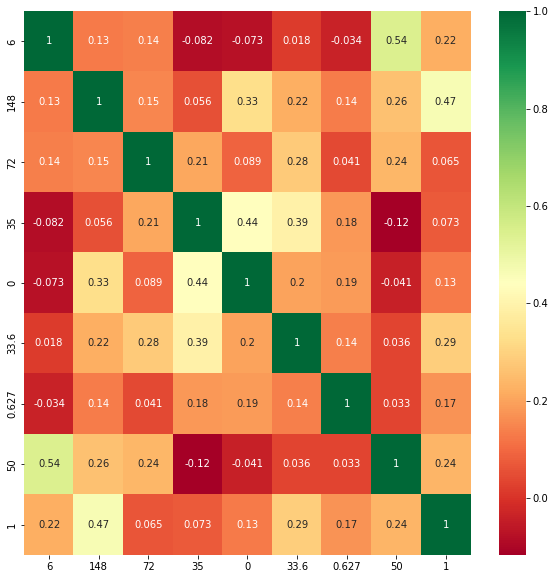

In [15]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
data.corr()

num_preg  glucose_conc  diastolic_bp  thickness   insulin  \
num_preg      1.000000      0.129459      0.141282  -0.081672 -0.073535   
glucose_conc  0.129459      1.000000      0.152590   0.057328  0.331357   
diastolic_bp  0.141282      0.152590      1.000000   0.207371  0.088933   
thickness    -0.081672      0.057328      0.207371   1.000000  0.436783   
insulin      -0.073535      0.331357      0.088933   0.436783  1.000000   
bmi           0.017683      0.221071      0.281805   0.392573  0.197859   
diab_pred    -0.033523      0.137337      0.041265   0.183928  0.185071   
age           0.544341      0.263514      0.239528  -0.113970 -0.042163   
skin         -0.081672      0.057328      0.207371   1.000000  0.436783   
diabetes      0.221898      0.466581      0.065068   0.074752  0.130548   

                   bmi  diab_pred       age      skin  diabetes  
num_preg      0.017683  -0.033523  0.544341 -0.081672  0.221898  
glucose_conc  0.221071   0.137337  0.263514  0.057328  0.466581  
diastolic_bp  0.281805   0.041265  0.239528  0.207371  0.065068  
thickness     0.392573   0.183928 -0.113970  1.000000  0.074752  
insulin       0.197859   0.185071 -0.042163  0.436783  0.130548  
bmi           1.000000   0.140647  0.036242  0.392573  0.292695  
diab_pred     0.140647   1.000000  0.033561  0.183928  0.173844  
age           0.036242   0.033561  1.000000 -0.113970  0.238356  
skin          0.392573   0.183928 -0.113970  1.000000  0.074752  
diabetes      0.292695   0.173844  0.238356  0.074752  1.000000

## Changing the diabetes column data from boolean to number

In [18]:
diabetes_map = {True: 1, False: 0}

In [21]:
data['diabetes']

KeyError: ignored

In [19]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

KeyError: ignored

In [ ]:
data.head(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  
0   50  1.3790         1  
1   31  1.1426         0  
2   32  0.0000         1  
3   21  0.9062         0  
4   33  1.3790         1

In [ ]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [ ]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [ ]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

In [ ]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

## Check how many other missing(zero) values

In [ ]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [ ]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [ ]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.719


In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



 Time taken: 0 hours 0 minutes and 1.02 seconds.


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.8s finished


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

In [ ]:
score

array([0.72727273, 0.77922078, 0.67532468, 0.67532468, 0.7012987 ,
       0.74025974, 0.76623377, 0.76623377, 0.77631579, 0.80263158])

In [ ]:
score.mean()

0.7410116199589883

keras program


In [ ]:

# first neural network with keras tutorial
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# load the dataset
dataset = pd.read_csv('/content/pima-data.csv')


In [ ]:
dataset

num_preg  glucose_conc  diastolic_bp  ...  age    skin  diabetes
0           6           148            72  ...   50  1.3790      True
1           1            85            66  ...   31  1.1426     False
2           8           183            64  ...   32  0.0000      True
3           1            89            66  ...   21  0.9062     False
4           0           137            40  ...   33  1.3790      True
..        ...           ...           ...  ...  ...     ...       ...
763        10           101            76  ...   63  1.8912     False
764         2           122            70  ...   27  1.0638     False
765         5           121            72  ...   30  0.9062     False
766         1           126            60  ...   47  0.0000      True
767         1            93            70  ...   23  1.2214     False

[768 rows x 10 columns]

In [ ]:
# split into input (X) and output (y) variables
x = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
# fit the keras model on the dataset
model.fit(x, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 0s 955us/step - loss: 8.0763 - accuracy: 0.2109
Epoch 2/150
77/77 [==============================] - 0s 926us/step - loss: -0.4042 - accuracy: 0.1706
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: -1.0342 - accuracy: 0.1888
Epoch 4/150
77/77 [==============================] - 0s 938us/step - loss: -1.8251 - accuracy: 0.1641
Epoch 5/150
77/77 [==============================] - 0s 931us/step - loss: -3.2546 - accuracy: 0.1680
Epoch 6/150
77/77 [==============================] - 0s 915us/step - loss: -6.0030 - accuracy: 0.1758
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: -12.1609 - accuracy: 0.2057
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: -27.1161 - accuracy: 0.2044
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: -61.5751 - accuracy: 0.2031
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: -121.6199 - ac

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(x, y)

24/24 [==============================] - 0s 916us/step - loss: -1022073.8125 - accuracy: 0.2096


In [ ]:
accuracy

[-1022073.8125, 0.2096354216337204]